In [1]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

H_flip = A.HorizontalFlip(p=1)
V_flip = A.VerticalFlip(p=1)
cutout = A.Cutout(num_holes=12, max_h_size=16, max_w_size=16, p=1) # 224 8, 448 16
blur = A.Blur(blur_limit=24, p=1)
ssr = A.ShiftScaleRotate(rotate_limit=30, p=1)
normalize = A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
to_tensor = ToTensorV2()

train_transform = A.Compose(
        [
            H_flip,          
            V_flip,
            ssr,
            blur,
            cutout,
            normalize,
            to_tensor
        ])

/opt/conda/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:691: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


In [2]:
import numpy as np
from PIL import Image
image = Image.open('../data/train/A2C_A4C/A2C_0648' + '.png').convert('RGB')
image1 = np.asarray(image)
mask = np.load('../data/train/A2C_A4C/A2C_0648' + '.npy')

In [12]:
np.max(image1), np.min(image1)

(255, 1)

In [3]:
from albumentations.core.transforms_interface import DualTransform

class Zoom(DualTransform):
    def __init__(self, height, width, always_apply=False, p=1):
        super(Zoom, self).__init__(always_apply, p)
        self.height = height
        self.width = width
        self.always_apply = always_apply
        self.p = p
        
    def apply(self, image, **params):
        print(image.shape)
        x, y, _ = image.shape
        if x != self.height or y != self.width:
            image = zoom(image, (self.height / x, self.width / y, 1), order=3)  # why not 3?
        return image
    
    def apply_to_mask(self, mask, **params):
        print(mask.shape)
        x, y = mask.shape
        if x != self.height or y != self.width:
            mask = zoom(mask, (self.height / x, self.width / y), order=0)
        return mask

    def get_transform_init_args_names(self):
        return ()

In [4]:
rotate = A.Rotate(limit=(-15,-14), interpolation=0)
img_size = 224
scale = A.Resize(img_size, img_size, interpolation=0)
scale = Zoom(img_size, img_size)
ssr = A.ShiftScaleRotate(scale_limit=0.1, rotate_limit=0, shift_limit=0, p=0.5)
train_transform = A.Compose(
        [
            V_flip,
#             to_tensor
        ])
from scipy.ndimage.interpolation import zoom
from scipy import ndimage

In [5]:
transformed = train_transform(image=image1, mask=mask)
image2 = transformed["image"]
mask2 = transformed["mask"]

x, y, _ = image1.shape
image3 = zoom(image1, (img_size / x, img_size / y, 1), order=2)  # why not 3?
mask3 = zoom(mask, (img_size / x, img_size / y), order=0)

In [229]:
import cv2
image4 = cv2.resize(image1, (224, 224), interpolation=cv2.INTER_CUBIC)

In [230]:
print(image4.shape, np.max(image4), np.min(image4))

(224, 224, 3) 253 0


In [226]:
print(image2.shape, np.max(image2), np.min(image2))
print(image3.shape, np.max(image3), np.min(image3))

print(mask2.shape, np.max(mask2), np.min(mask2))
print(mask3.shape, np.max(mask3), np.min(mask3))

(434, 636, 3) 254 0
(224, 224, 3) 252 0
(434, 636) 1 0
(224, 224) 1 0


In [26]:
a.shape

(2, 600, 800, 3)

In [29]:
a = np.array([image1, image1])
b = zoom(a, (1,512 / 384, 512 / 384,1), order=0)

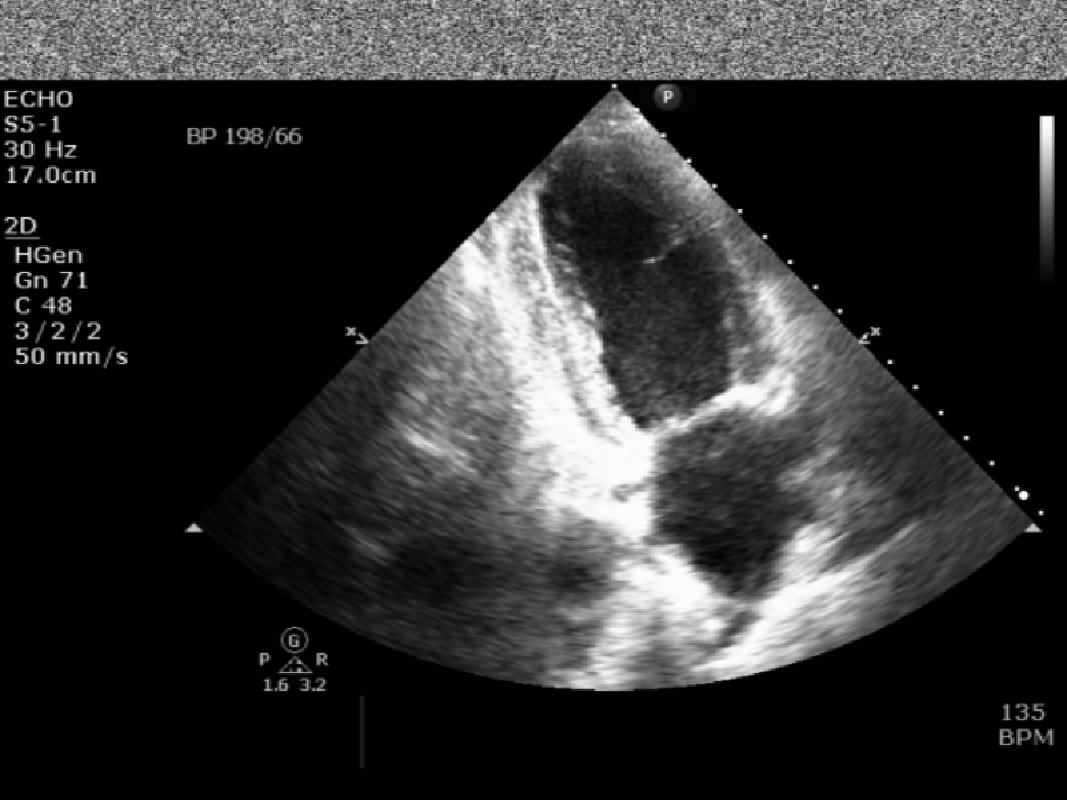

In [32]:
Image.fromarray(b[0])

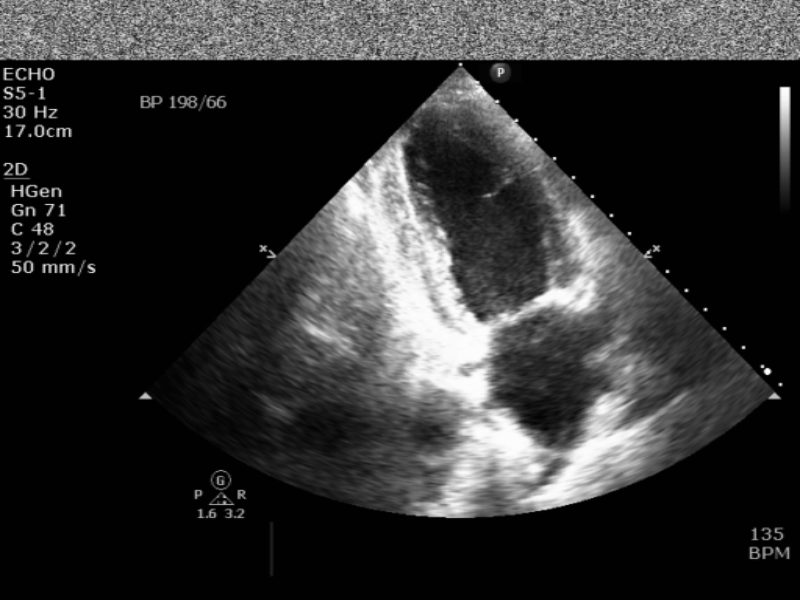

In [31]:
Image.fromarray(image1)

In [22]:
# image2 = np.flip(image1, axis=0)
image3 = np.rot90(image1, 2)
image4 = np.rot90(image3, -2)

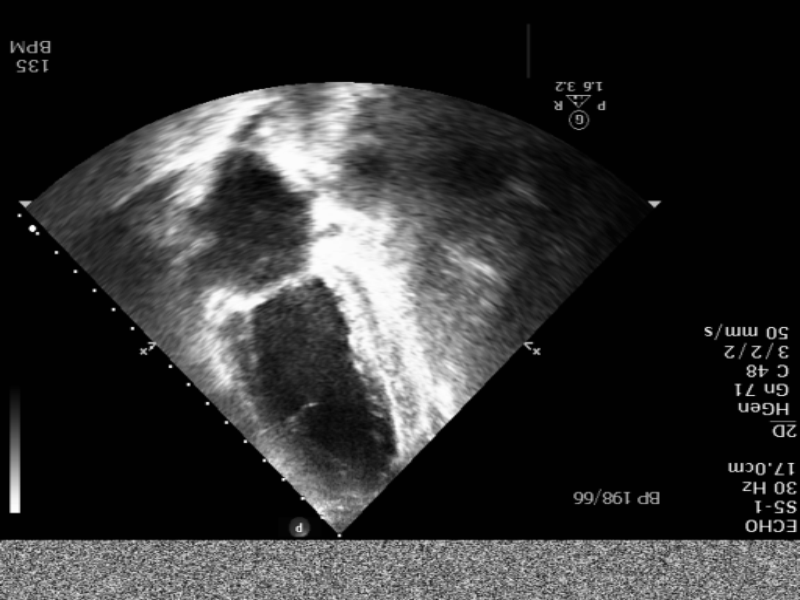

In [23]:
Image.fromarray(image3)

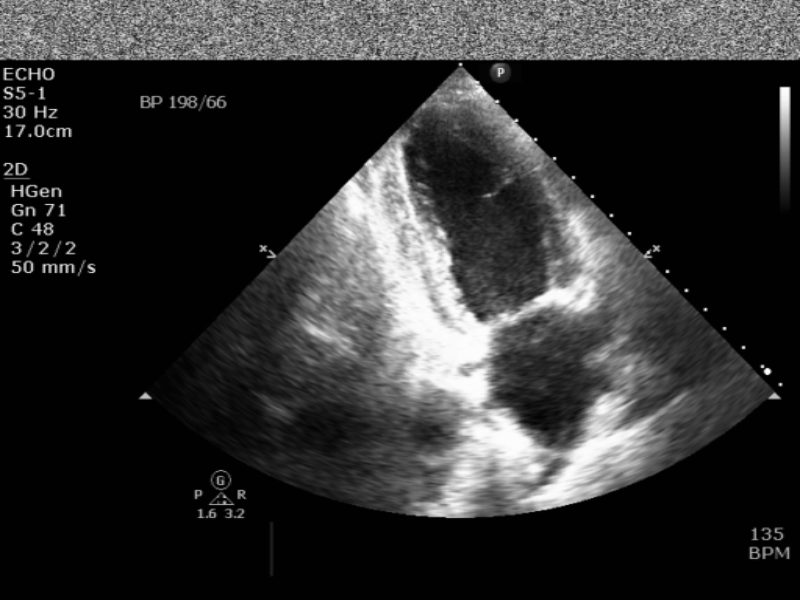

In [24]:
Image.fromarray(image4)

In [7]:
np.where(image1 == 0)[0][0]

41

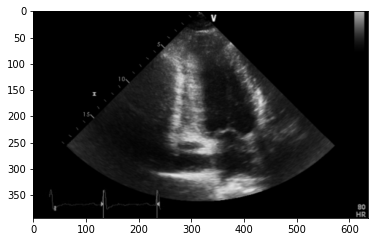

In [10]:
plt.imshow(image1[41:])

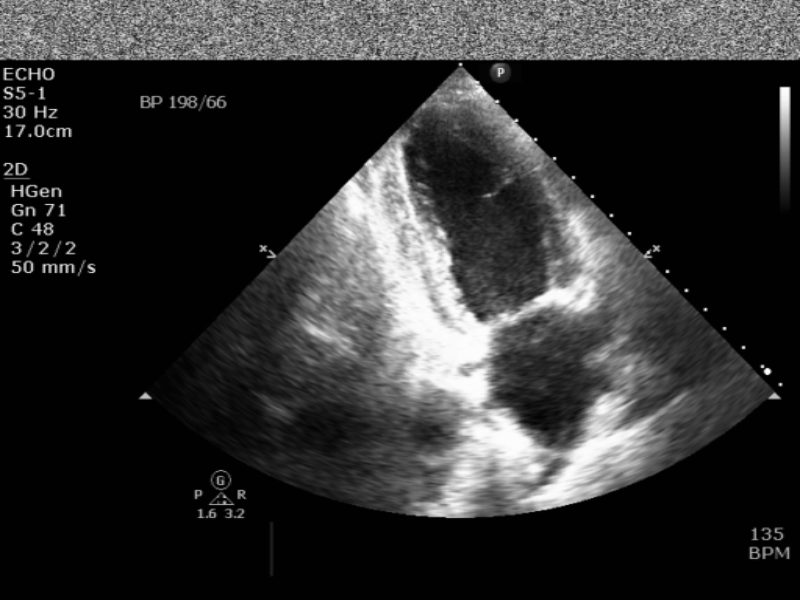

In [16]:
image